
*********************100%***********************]  1 of 1 completed

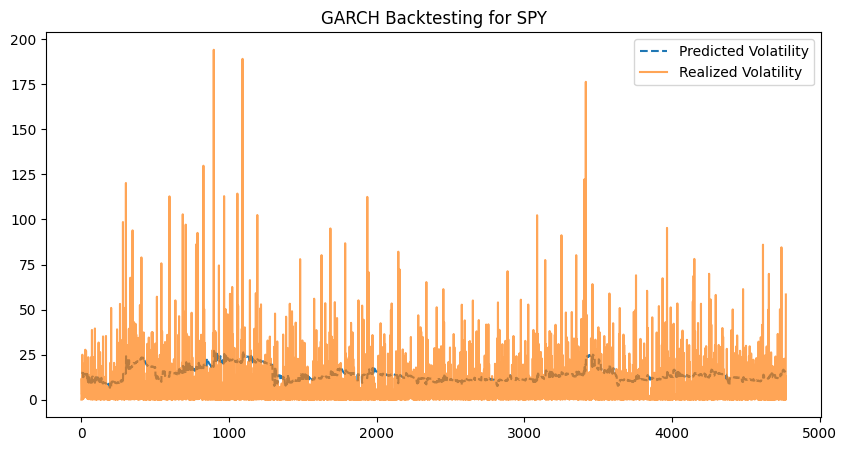

{'MAE': np.float64(13.715409618941024), 'RMSE': np.float64(16.390814052227586)}


In [5]:
#GARCH backtesting tool

import numpy as np
import pandas as pd
import yfinance as yf
from arch import arch_model
import matplotlib.pyplot as plt

def get_garch_forecast(ticker, start_date, end_date, backtest_window=252):
    data = yf.download(ticker, start=start_date, end=end_date)#["Adj Close"]
    returns = 100 * data.pct_change().dropna()
    returns = returns.to_numpy().reshape(-1)  # Ensure returns is a 1D array
    
    rolling_forecasts = []
    actual_volatility = []
    
    for i in range(len(returns) - backtest_window):
        train = returns[i : i + backtest_window]
        model = arch_model(train, vol="Garch", p=1, q=1)
        res = model.fit(disp="off")
        
        #forecast = res.forecast(start=backtest_window + i, reindex=False)
        forecast = res.forecast(horizon=1)
        rolling_forecasts.append(forecast.variance.values[-1][0])
        actual_volatility.append(returns[i + backtest_window] ** 2)
    
    rolling_forecasts = np.sqrt(np.array(rolling_forecasts))
    actual_volatility = np.sqrt(np.array(actual_volatility))
    
    # Compute performance metrics
    mae = np.mean(np.abs(rolling_forecasts - actual_volatility))
    rmse = np.sqrt(np.mean((rolling_forecasts - actual_volatility) ** 2))
    
    # Plot results
    plt.figure(figsize=(10, 5))
    plt.plot(rolling_forecasts, label="Predicted Volatility", linestyle="--")
    plt.plot(actual_volatility, label="Realized Volatility", alpha=0.7)
    plt.legend()
    plt.title(f"GARCH Backtesting for {ticker}")
    plt.show()
    
    return {"MAE": mae, "RMSE": rmse}

# Example usage
# Enter desired ticker below
ticker = "SPY"
start_date = "2020-01-01"
end_date = "2024-01-01"
backtest_results = get_garch_forecast(ticker, start_date, end_date)
print(backtest_results)


In [ ]:
GARCH backtesting is useful for evaluating how well your volatility model performs in real-world scenarios. Here’s why it matters:

1. Evaluating Forecast Accuracy
Compare predicted vs. actual volatility over a historical period to see how well GARCH captures market dynamics.
Common metrics: Mean Absolute Error (MAE), Root Mean Squared Error (RMSE)
2. Risk Management & Trading
Helps in VaR (Value at Risk) estimation, which is crucial for financial risk assessment.
Traders use it to adjust portfolio exposure based on expected volatility.
3. Model Selection & Fine-Tuning
Different GARCH variants (GARCH(1,1), EGARCH, TGARCH) may work better for different assets.
Backtesting helps identify overfitting—if a model predicts past data well but fails on new data.
4. Market Regime Detection
If GARCH systematically underpredicts volatility, it may indicate sudden market shifts (e.g., crashes, high volatility periods).
5. Stress Testing & Scenario Analysis
You can simulate shocks to see how volatility forecasts react under extreme conditions.
Would you like to add another layer, such as comparing different GARCH models or incorporating a trading strategy based on forecasts?